In [1]:
from qiskit import QuantumCircuit, QuantumRegister, BasicAer, IBMQ, execute

from qiskit.tools.monitor import job_monitor

from qiskit.quantum_info import *

from qiskit.circuit import Parameter

from qiskit.ignis.verification import *

import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_format = 'svg'

from math import pi

# useful additional packages 
from qiskit.tools.visualization import plot_state_city
from qiskit.providers.ibmq import least_busy

In [2]:
account = IBMQ.load_account()

In [3]:
theta1 = Parameter('$θ_1$')
phi1 = Parameter('$φ_1$')
lamb1 = Parameter('$λ_1$')

theta2 = Parameter('$θ_2$')
phi2 = Parameter('$φ_2$')
lamb2 = Parameter('$λ_2$')

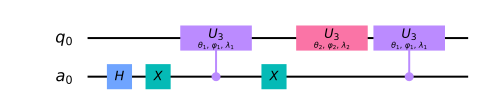

In [4]:
q = QuantumRegister(1, name='q')
a = QuantumRegister(1, name='a')
switch = QuantumCircuit(q, a, name='$\mathcal{S}$')

switch.h(1)
switch.x(1)
switch.cu3(theta1, phi1, lamb1, 1,0)
switch.x(1)
switch.barrier()
switch.u3(theta2, phi2, lamb2, 0)
switch.cu3(theta1, phi1, lamb1, 1,0)

switch.draw(output='mpl', plot_barriers=False, scale=0.6)

In [9]:
#bit-flip and phase-flip channels
instance = switch.bind_parameters({theta1:pi, phi1:-pi/2, lamb1:pi/2, theta2:0, phi2:0, lamb2:pi})

In [10]:
circuits = process_tomography_circuits(instance, [0])

In [11]:
provider = IBMQ.get_provider('ibm-q')
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
j = execute(circuits, backend=backend, shots=8192)
job_monitor(j)

Job Status: job has successfully run


In [12]:
results = j.result()
fitter = ProcessTomographyFitter(results, circuits)
choi = fitter.fit()

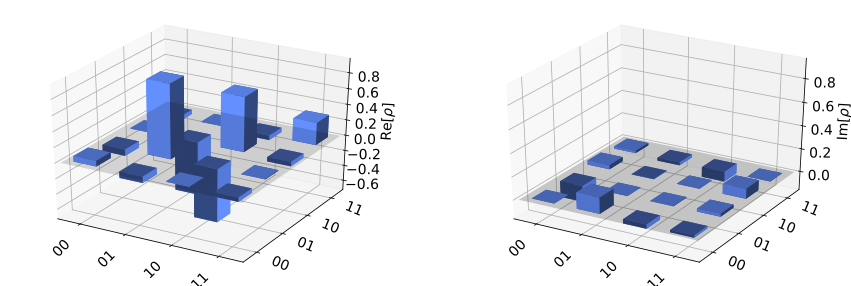

In [13]:
plot_state_city(choi.data)